In [9]:
import pandas as pd

### Data Preparation and Cleaning

The dataset is combined from TMDB API and OMDB API.

You can look at the scraping process in scrape_data.ipynb

In [16]:
# The dataset is combined from TMDB API and OMDB API.
# You can look at the scraping process in scrape_data.ipynb
df = pd.read_parquet('../data/movies.parquet')

In [17]:
df.shape

(5215, 59)

In [4]:
credits_df = pd.read_parquet('../data/credits.parquet')
credits_df.shape


(14529, 3)

In [5]:
df = df.merge(credits_df, on='id', how='left')
print(df.shape)
print(df[df['cast'].notnull()].shape)
print(df[df['crew'].notnull()].shape)

(7551, 61)
(7551, 61)
(7551, 61)


Let's take a look at the shape, features that are available to us and preview the data

Dataset is X movies with 58 metadata columns/features. 

In [6]:
print(df.shape)
print(df.columns)
df.head(10)

(7551, 61)
Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Title', 'Year', 'Rated', 'Released',
       'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language',
       'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating',
       'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production',
       'Website', 'Response', 'belongs_to_collection.id',
       'belongs_to_collection.name', 'belongs_to_collection.poster_path',
       'belongs_to_collection.backdrop_path', 'totalSeasons', 'Season',
       'Episode', 'seriesID', 'Error', 'cast', 'crew'],
      dtype='object')


adult                     backdrop_path belongs_to_collection    budget  \
0  False  /92ByOurbPtxJG3jAuJexNWkpWJB.jpg                  None  15000000   
1  False  /vEFiPOl7Egj8WDjjZMPn1O9EyPJ.jpg                  None   2000000   
2  False  /vb4BE2jdiUR6lCumcFGA0MZxEZE.jpg                  None   1000000   
3  False  /qZ7FgN21pCAiY1PfHPDRqqrHUDj.jpg                  None  12000000   
4  False  /s9v1QZMVhwShQ7415jPhtfqzyjG.jpg                  None  12850990   
5  False  /9zMbyilain3lcbX16fZwEkIBMLB.jpg                  None  35000000   
6  False  /aKocfcKDF4DJopM6vfRT1CUXRey.jpg                  None  19000000   
7  False  /2tfKQhqFaz5MXV6b0iZ9R0oWS76.jpg                  None   6500000   
8  False  /7V4vwJrieINgLYwDAAHEZmlvCIB.jpg                  None  16000000   
9  False  /kwY1HeoEIDXCdpb4PMdyzCiBUCV.jpg                  None  40000000   

                                              genres  \
0  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
1                     [{'id': 10752, 'name': 'War'}]   
2                [{'id': 99, 'name': 'Documentary'}]   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...   
4  [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...   
5  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
6  [{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...   
7  [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...   
8  [{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...   
9  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...   

                                  homepage     id    imdb_id  \
0                                           13501  tt0484111   
1                   http://admiralfilm.ru/  13506  tt1101026   
2  http://www.whokilledtheelectriccar.com/  13508  tt0489037   
3                                           13509  tt0093560   
4                                           13510  tt1020530   
5                                           13515  tt0790686   
6         http://www.sexdrivethemovie.com/  13523  tt1135985   
7                                           13524  tt0058947   
8                                           13526  tt0210382   
9                                           13536  tt0269095   

  original_language                original_title  ...  \
0                en                The Good Night  ...   
1                ru                      Адмиралъ  ...   
2                en  Who Killed the Electric Car?  ...   
3                en             The Monster Squad  ...   
4                en                     Eden Lake  ...   
5                en                       Mirrors  ...   
6                en                     Sex Drive  ...   
7                en           Battle of the Bulge  ...   
8                en           The Weight of Water  ...   
9                en               City by the Sea  ...   

  belongs_to_collection.name  belongs_to_collection.poster_path  \
0                       None                               None   
1                       None                               None   
2    Electric Car Collection                               None   
3                       None                               None   
4                       None                               None   
5         Mirrors Collection   /uiEEpqieH4kXQqps2QC19wOqd8v.jpg   
6                       None                               None   
7                       None                               None   
8                       None                               None   
9                       None                               None   

  belongs_to_collection.backdrop_path totalSeasons Season Episode  seriesID  \
0                                None         None   None    None      None   
1                                None         None   None    None      None   
2                                None         None   None    None      None   
3                                None         None   None    None      None   
4                                None         None

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   adult                                7551 non-null   bool   
 1   backdrop_path                        6773 non-null   object 
 2   belongs_to_collection                0 non-null      object 
 3   budget                               7551 non-null   int64  
 4   genres                               7551 non-null   object 
 5   homepage                             7551 non-null   object 
 6   id                                   7551 non-null   int64  
 7   imdb_id                              7551 non-null   object 
 8   original_language                    7551 non-null   object 
 9   original_title                       7551 non-null   object 
 10  overview                             7551 non-null   object 
 11  popularity                    

Let's have a look at columns and select only relevant ones

In [27]:
# title vs original title: so we can see that original_title is in the native language, so we can drop it and leave only title
df[df['original_title'] != df['title']][['title', 'original_title']].head(10)

title                      original_title
1                                  Admiral                            Адмиралъ
38               Night of the Living Dorks        Die Nacht der lebenden Loser
40                          The Crocodiles                   Vorstadtkrokodile
61  The First Day of the Rest of Your Life  Le Premier Jour du reste de ta vie
70                             Jamon Jamon                        Jamón, jamón
74                          My Best Friend                    Mon Meilleur Ami
77          Conversations with My Gardener         Dialogue avec mon jardinier
80         Death Is Nimble, Death Is Quick     Kommissar X - Drei gelbe Katzen
81                    Kiss Kiss, Kill Kill    Kommissar X - Jagd auf Unbekannt
82               The Count of Monte Cristo            Le Comte de Monte-Cristo

In [14]:
# let's see movies status
print(df['status'].value_counts())

status
Released    5091
Name: count, dtype: int64


In [15]:
# We have too many False in adult columns and mostly NULL values in belongs_to_collection.
# Those 2 features are not of much use to us
print(df['adult'].value_counts())
print(df['belongs_to_collection'].value_counts())

adult
False    5087
True        4
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


In [10]:
df.head().transpose()

0  \
adult                                                              False   
backdrop_path                           /92ByOurbPtxJG3jAuJexNWkpWJB.jpg   
belongs_to_collection                                               None   
budget                                                          15000000   
genres                 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
...                                                                  ...   
Episode                                                             None   
seriesID                                                            None   
Error                                                               None   
cast                   [{'adult': False, 'cast_id': 5, 'character': '...   
crew                   [{'adult': False, 'credit_id': '5d34dfeb2f8d09...   

                                                                       1  \
adult                                                              False   
backdrop_path                           /vEFiPOl7Egj8WDjjZMPn1O9EyPJ.jpg   
belongs_to_collection                                               None   
budget                                                           2000000   
genres                                    [{'id': 10752, 'name': 'War'}]   
...                                                                  ...   
Episode                                                             None   
seriesID                                                            None   
Error                                                               None   
cast                   [{'adult': False, 'cast_id': 5, 'character': '...   
crew                   [{'adult': False, 'credit_id': '61a7503385c0a2...   

                                                                       2  \
adult                                                              False   
backdrop_path                           /vb4BE2jdiUR6lCumcFGA0MZxEZE.jpg   
belongs_to_collection                                               None   
budget                                                           1000000   
genres                               [{'id': 99, 'name': 'Documentary'}]   
...                                                                  ...   
Episode                                                             None   
seriesID                                                            None   
Error                                                               None   
cast                   [{'adult': False, 'cast_id': 3, 'character': '...   
crew                   [{'adult': False, 'credit_id': '52fe4573925141...   

                                                                       3  \
adult                                                              False   
backdrop_path                           /qZ7FgN21pCAiY1PfHPDRqqrHUDj.jpg   
belongs_to_collection                                               None   
budget                                                          12000000   
genres                 [{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...   
...                                                                  ...   
Episode                                                             None   
seriesID                                                            None   
Error                                                               None   
cast                   [{'adult': False, 'cast_id': 1, 'character': '...   
crew                   [{'adult': False, 'credit_id': '530183ae925141...   

                                                                       4  
adult                                                              False  
backdrop_path                           /s9v1QZMVhwShQ7415jPhtfqzyjG.jpg  
belongs_to_collection                                               None  
budget                                                          12850990  
genres                 [{'id': 27, 'name': '

In [11]:
# we have release_date column which have day, month and year so other date related columns as Year and Released can be dropped
df[df['release_date'].isnull()].shape #- zero NULL values

(0, 61)

In [12]:
# let's look at how many NULLs other fields contain
var = df.isnull().sum()
print(var.to_string())

adult                                     0
backdrop_path                           774
belongs_to_collection                  7547
budget                                    0
genres                                    0
homepage                                  0
id                                        0
imdb_id                                   0
original_language                         0
original_title                            0
overview                                  0
popularity                                0
poster_path                             228
production_companies                      0
production_countries                      0
release_date                              0
revenue                                   0
runtime                                   0
spoken_languages                          0
status                                    0
tagline                                   0
title                                     0
video                           

In [13]:
# we will need only movies, because others are incompariable categories
print(df['Type'].value_counts())
df[df['Type'].str.lower() == 'series'][['title', 'original_title']]
df = df[df['Type'].str.lower() == 'movie']

Type
movie      7516
series       19
episode      12
Name: count, dtype: int64


Let's summaries our findings on columns

| Column | Meaning | Take as a feature? | Why? | 
| :- | :- | :- | :- |
| adult | if the movie is X-Rated or Adult | No | too many identical values (False), not usefull |
| backdrop_path | path to image | No | not usefull |
| belongs_to_collection | the movie series the particular film belongs to | No | almost all NULL |
| genres | the genres associated with the movie | Yes | - |
| homepage | path to the movie homepage | No | not usefull |
| id | TMDB id | Yes | not usefull but I will leave it to join with credits dataset |
| imdb_id | IMDB id | No | not usefull |
| original_language | the language in which the movie was originally shot in | Yes | - |
| original_title | The original title of the movie in the native language | No | not usefull |
| overview | short description of the movie | Yes | - |
| poster_path | path to image | No | not usefull |
| production_companies | list of production companies involved with the making of the movie | Yes | - |
| production_countries | list of countries where the movie was shot/produced in | Yes | - |
| release_date |  | Yes | - |
| runtime | the runtime of the movie in minutes | Yes | - |
| spoken_languages | list of spoken languages in the film | Yes | - |
| status | status of the movie | No | we take only Released status |
| tagline | tagline of the movie | Yes | - |
| status | status of the movie | No | we take only Released status |
| title | title of the movie | Yes | - |
| video | Indicates if there is a video present of the movie with TMDB | No | not usefull |
| vote_count | number of votes by users, as counted by TMDB | Yes | - |
| Title |  | No | duplicate of title |
| Year |  | No | duplicate of year in the release_date |
| Rated | MPA film rating | Yes | - |
| Released |  | No | duplicate of release_date |
| Runtime |  | No | duplicate of runtime |
| Genre |  | No | duplicate of genres |
| Director |  | No | we will get thi info from credits dataset |
| Writer |  | No | we will get thi info from credits dataset |
| Actors |  | No | we will get thi info from credits dataset |
| Plot |  | Yes | - |
| Language |  | No | duplicate of original_language |
| Country |  | No | duplicate of production_countries |
| Poster | path to poster image | No | not usefull |
| imdbVotes | count of voutes | Yes | - |
| imdbID | IMDB id | No | not usefull |
| Type | status of the movie | No | we filtered only movie type |
| totalSeasons |  | No | Not relevant |
| Season |  | No | Not relevant |
| Episode |  | No | Not relevant |
| seriesID |  | No | Not relevant |
| Error |  | No | Not relevant |
| belongs_to_collection.id|  | No | Almost all rows are NULL |
| belongs_to_collection.name|  | No | Almost all rows are NULL |
| belongs_to_collection.poster_path|  | No | Almost all rows are NULL |
| belongs_to_collection.backdrop_path|  | No | Almost all rows are NULL |
| DVD | the date when the movie was released on dvd | No | Not useful |
| Website | link | No | Not useful |
| BoxOffice |  | No | We have revenue column plus too many NULLS |
| Production |  | No | We have production_companies column |
| Response | link | No | Not relevant |
| Ratings | list of ratings in different system - metacritic (in Metascore), rotten tomatoes, imdb (in imdbRating) | Yes | |
| Metascore | metacritic rating | Yes | - |
| imdbRating | imdb raiting | Yes | - |
| vote_average | average rating of the movie by TMDB | Yes | - |
| popularity | popularity Score assigned by TMDB | Yes | - |
| budget | the budget of the movie in dollars | Yes | - |
| revenue | the total revenue of the movie in dollars | Yes | - |
| Awards |  | Yes | - |


In [14]:
# 'Director', 'Writer', 'Actors',
dataset_df = df[['id','title', 'release_date', "original_language" , 'spoken_languages', 'genres',
                       'production_companies',  'production_countries', 'runtime', 'Rated', 'tagline', 'overview', 'Plot',
                       'budget', 'revenue', 'popularity', 'vote_average', 'vote_count',
                         'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes']].copy()

# Standardize column names
dataset_df.columns = dataset_df.columns.str.lower().str.replace(' ', '_')
dataset_df.rename(columns={"popularity": "tmdb_popularity", "vote_average": "tmdb_vote_average",
                     "vote_count": "tmdb_vote_count", 'metascore': 'metacritic_rating',
                     "imdbrating": "imdb_rating", 'imdbvotes': 'imdb_votes'}, inplace=True)

# let's unpack values from the dictionaries to lists for columns: genres, production_companies, production_countries, spoken_languages
# same for spoken_languages and production_countries
dataset_df['genres'] = dataset_df['genres'].apply(lambda x: ','.join([d['name'] for d in x]))
dataset_df['production_companies'] = dataset_df['production_companies'].apply(lambda x: ','.join([d['name'] for d in x]))
dataset_df['production_countries'] = dataset_df['production_countries'].apply(lambda x: ','.join([d['iso_3166_1'] for d in x]))
dataset_df['spoken_languages'] = dataset_df['spoken_languages'].apply(lambda x: ','.join([d['iso_639_1'] for d in x]))

#let's extract rotten tomatoes rating from Ratings column
# and convert other ratings to numeric values

def extract_rating(ratings, source):
    for rating in ratings:
        if rating['Source'] == source:
            return rating['Value']
    return None

dataset_df['rotten_tomatoes_rating'] = dataset_df['ratings'].apply(lambda x: extract_rating(x, 'Rotten Tomatoes')) 
dataset_df['rotten_tomatoes_rating'] = dataset_df['rotten_tomatoes_rating'].str.replace('%', '')

dataset_df['imdb_rating'] = pd.to_numeric(dataset_df['imdb_rating'], errors='coerce')
dataset_df['imdb_votes'] = dataset_df['imdb_votes'].str.replace(',', '')
dataset_df['imdb_votes'] = pd.to_numeric(dataset_df['imdb_votes'], errors='coerce')
dataset_df['rotten_tomatoes_rating'] = pd.to_numeric(dataset_df['rotten_tomatoes_rating'], errors='coerce')
dataset_df['metacritic_rating'] = pd.to_numeric(dataset_df['metacritic_rating'], errors='coerce')

# get relase year and release month
dataset_df['release_month'] = pd.to_datetime(dataset_df['release_date']).dt.month
dataset_df['release_year'] = pd.to_datetime(dataset_df['release_date']).dt.year
dataset_df.drop(['release_date', 'ratings'], axis=1, inplace=True)

# lower all values in categorical columns
categorical_vars = list(dataset_df.dtypes[dataset_df.dtypes == 'object'].index)
for c in categorical_vars:
    dataset_df[c] = dataset_df[c].str.lower()

pd.set_option('display.max_columns', None)
dataset_df.head(2)


id           title original_language spoken_languages  \
0  13501  the good night                en            en,it   
1  13506         admiral                ru            ru,fr   

                               genres  \
0  comedy,drama,romance,fantasy,music   
1                                 war   

                                production_companies production_countries  \
0  destination films,tempesta films,inferno distr...                gb,us   
1   film direction,dago productions,20th century fox                   ru   

   runtime      rated                 tagline  \
0       93          r  dreaming is believing.   
1      123  not rated     the highest command   

                                            overview  \
0  gary, a musician, is trapped in an unhappy rel...   
1  this is a story of a great love facing the gre...   

                                                plot    budget   revenue  \
0  a former pop star who now writes commercial ji...  15000000    508084   
1  the story of admiral aleksandr kolchak who rem...   2000000  38135878   

   tmdb_popularity  tmdb_vote_average  tmdb_vote_count  \
0            8.234              5.301              108   
1           10.672              6.487              118   

                   awards  metacritic_rating  imdb_rating  imdb_votes  \
0            1 nomination               49.0          5.7      8681.0   
1  9 wins & 9 nominations                NaN          6.7      8467.0   

   rotten_tomatoes_rating  release_month  release_year  
0                    30.0              1          2007  
1                     NaN              6          2008

In [34]:
# let's look at awards column
dataset_df[['awards']].to_csv("1.csv")


So if you open the csv file you might notice the following patterns:

    - n/a
    - X win/wins
    - Y nomination/nominations
    - X win/wins & Y nomination/nominations
    - nominated for A oscar/oscars. X win/wins & Y nomination/nominations total
    - won A oscar/oscars. 1X win/wins & Y nomination/nominations total
    - nominated for B bafta X win/wins & Y nomination/nominations total'
    - won B bafta X win/wins & Y nomination/nominations total
    - won E primetime emmy. X win/wins & Y nomination/nominations total
    - nominated for E primetime emmys

Let's use regex and unpack those values to the separate columns but before this transformation we should add another filter on the dataset. I noticed "emmy" award so we should check genres and filter the dataset on those which are different categories of movies in terms of budget or awards.  

In [15]:
# need to check genres
import pandas as pd
from collections import Counter
import ast  # if needed to convert string representation of list to list

genres_df = dataset_df.copy()
genres_df['genres'] = genres_df['genres'].str.split(',')
# Flatten the list of lists and count the occurrences of each country code
genre_counter = Counter(genre for genre_list in genres_df['genres'].dropna() for genre in genre_list)
# Convert the Counter object to a DataFrame for easier viewing and analysis
genre_frequencies = pd.DataFrame(genre_counter.items(), columns=['genres', 'frequency'])

# Sort the DataFrame by frequency
genre_frequencies = genre_frequencies.sort_values(by='frequency', ascending=False).reset_index(drop=True)
genre_frequencies

genres  frequency
0             drama       3529
1            comedy       2756
2          thriller       1661
3            action       1406
4           romance       1314
5             crime       1212
6         adventure       1001
7            horror        832
8   science fiction        731
9           fantasy        586
10           family        562
11          mystery        557
12          history        338
13        animation        267
14              war        263
15            music        235
16      documentary        199
17          western        159
18         tv movie        126
19                          22

In [16]:
print(dataset_df.shape)

(7516, 24)


So we have Documentary, tv movie and some of the rows are without genre. Let's look at them and count total amount of rows

In [17]:
# Filter rows where 'tv movie' or 'documentary' is in the 'Genres' column
outliers = dataset_df[dataset_df['genres'].apply(lambda x: 'tv movie' in x or 'documentary' in x or not x)][['title', 'awards', 'genres']]
print(outliers.shape)
outliers

(347, 3)


title  \
2                     who killed the electric car?   
19                                      this is it   
88                       the world's biggest penis   
91    hearts of darkness: a filmmaker's apocalypse   
97                       the count of monte-cristo   
...                                            ...   
7477                             short working day   
7481                                 gimme shelter   
7482                                       primary   
7484                    bob dylan - dont look back   
7508           the arrival of a train at la ciotat   

                                                 awards  \
2                                         4 nominations   
19                              6 wins & 10 nominations   
88                                                  n/a   
91    won 2 primetime emmys. 8 wins & 5 nominations ...   
97    nominated for 2 primetime emmys. 2 nominations...   
...                                                 ...   
7477                                                n/a   
7481                              3 wins & 1 nomination   
7482                                              1 win   
7484                                             4 wins   
7508                                                n/a   

                                       genres  
2                                 documentary  
19                          music,documentary  
88                                documentary  
91                                documentary  
97    adventure,action,drama,history,tv movie  
...                                       ...  
7477                           drama,tv movie  
7481                        documentary,music  
7482                              documentary  
7484                        documentary,music  
7508                              documentary  

[347 rows x 3 columns]

Let's filter those rows

In [18]:
dataset_df = dataset_df[dataset_df['genres'].apply(lambda x: 'tv movie' not in x and 'documentary' not in x )]
dataset_df = dataset_df[dataset_df['genres'].apply(lambda x: len(x) > 0)]
print(dataset_df.shape)

(7169, 24)


Now we can use regex on awards column.

In [19]:
import re


pattern = {'oscar_won': re.compile(r'won (\d+) oscar', re.IGNORECASE),
           'oscar_nominated': re.compile(r'nominated for (\d+) oscar', re.IGNORECASE),
           'bafta_won': re.compile(r'won (\d+) bafta', re.IGNORECASE),
           'bafta_nominated': re.compile(r'nominated for (\d+) bafta', re.IGNORECASE),
           'awards_won': re.compile(r'(\d+)\s*win', re.IGNORECASE),
           'awards_nominated': re.compile(r'(\d+)\s*nomination', re.IGNORECASE)}
dataset_df['awards'] = dataset_df['awards'].str.replace('n/a', '')
for k, v in pattern.items():
# Use str.extract() to extract the number of Oscars won
    dataset_df[k] = dataset_df['awards'].str.extract(v).fillna(0).astype(int)

dataset_df.drop('awards', axis=1, inplace=True)


Let's have a look at money metadata in the dataset. We have budget column and revenue columns. So there are a few observation:

    - movie should have budget and revenue as not 0 otherwise it's hard to unstarstand if it's successfull or not
    - we should create a metric above those 2 columns - ROI - return on investment which is calculated as the ratio of the net profit to the investment amount.  Formula (revenue - budget) / budget * 100%
    - we should consider normalizing revenue figures for inflation. I'm going to use historical inflation data to adjust the budget and revenue figures to today's dollars before calculating the ROI. This would provide a more accurate comparison of the financial success of movies over time. I found historical inflation rates here https://www.kaggle.com/datasets/pavankrishnanarne/us-inflation-dataset-1947-present/data. The dataset starts from 1947 so we should filter our movies starting from 1947.

In [30]:
print(dataset_df[dataset_df['budget'] == 0].shape)
print(dataset_df[dataset_df['revenue'] == 0].shape)

(2592, 29)
(2571, 29)


In [33]:
# We should also check if we don't have some weird values for budget and revenue, I can't imagine a movie with a budget less than 1k,
# let's see what we have in the dataset

filtered_df = dataset_df[(dataset_df['budget'] < 1000) | (dataset_df['revenue'] < 1000)]

filtered_df = filtered_df[(filtered_df['budget'] != 0) & (filtered_df['revenue'] != 0)]

print(filtered_df.shape)

filtered_df[['title', 'budget', 'revenue']]


(15, 29)


title    budget   revenue
635                                          ben x   1500000        27
1233                                 walk on water   1400000       444
1443                     the notorious bettie page        90   1410778
1583                                 cross of iron   6000000       201
1770  city slickers ii: the legend of curly's gold        40        43
2565      the lost treasure of the knights templar        85      9984
3441                                   housesitter        26        94
4380                                         naked        25        24
4484                      kiss of the spider woman        11  17005229
5113                                   high strung    300000       904
5167                             sex and death 101         5         1
7175                                    trojan war  15000000       309
7241                     the eylandt investigation       250     20604
7246                                   hero wanted         6        10
7278      french fried vacation 3: friends forever        35        84

I can only guess that there is an error in zeros in those numbers, and they are supposed to be millions or thousands here, but the amount is so small so let's get rid of them too. 

In [34]:
cpi_data = pd.read_csv('../US_inflation_rates.csv', names=['date', 'CPI'], skiprows=1)  # Your CPI data

# Convert the 'date' column to datetime format and extract the year and month
cpi_data['date'] = pd.to_datetime(cpi_data['date'], format='%Y-%m-%d')
cpi_data['year'] = cpi_data['date'].dt.year
cpi_data['month'] = cpi_data['date'].dt.month

# Merge the datasets on year and month
merged_data = pd.merge(dataset_df, cpi_data, left_on=['release_year', 'release_month'], right_on=['year', 'month'], how='left')

# filter movies with unknown budget or revenue or with less than 1000$
merged_data = merged_data[(merged_data['budget'] >= 1000) & (merged_data['revenue'] >= 1000)]

# Find the most recent year and month in the dataset
max_year = cpi_data['year'].max()
max_month = cpi_data[cpi_data['year'] == max_year]['month'].max()

# Get the CPI value for the target year and month
target_cpi = cpi_data[(cpi_data['year'] == max_year) & (cpi_data['month'] == max_month)]['CPI'].values[0]

# Calculate the adjustment factor
merged_data['adjustment_factor'] = target_cpi / merged_data['CPI']

# Adjust the budget and revenue columns
merged_data['adjusted_budget'] = merged_data['budget'] * merged_data['adjustment_factor']
merged_data['adjusted_revenue'] = merged_data['revenue'] * merged_data['adjustment_factor']

# Set the float format to display the entire number
pd.options.display.float_format = '{:.2f}'.format

merged_data['adjusted_ROI'] = ((merged_data['adjusted_revenue'] - merged_data['adjusted_budget']) / merged_data['adjusted_budget']) * 100
dataset_df = merged_data[merged_data['release_year'] >= 1947].drop(['year', 'month', 'date', 'CPI', 'adjustment_factor', 'budget', 'revenue', 'adjusted_revenue', 'adjusted_budget'], axis=1)

By the way, real ROI calculation for movies is more complicated. I found this article https://planetstoryline.com/roi-and-the-true-cost-of-making-a-movie/ which says that ROI is calculated from box office returns and "The part of the movie ROI a film investor receives is usually 50% of the profit from a film, with the other 50% going to the film’s producers, who can then pay part of their portion to third-party participants, such as creators, makers and stars." So we simplified the calculation process a little for the midterm project - just took revenue and budget and that's it.

Also BO is not very good metric these times, now that we have streaming platforms.

In [35]:
dataset_df.head(10)

id                title original_language spoken_languages  \
0  13501       the good night                en            en,it   
1  13506              admiral                ru            ru,fr   
2  13509    the monster squad                en         de,en,pt   
3  13510            eden lake                en               en   
4  13515              mirrors                en               en   
5  13523            sex drive                en               en   
6  13524  battle of the bulge                en            de,en   
7  13526  the weight of water                en               en   
8  13536      city by the sea                en               en   
9  13537      shattered glass                en               en   

                               genres  \
0  comedy,drama,romance,fantasy,music   
1                                 war   
2               comedy,action,fantasy   
3                     horror,thriller   
4                      horror,mystery   
5            comedy,adventure,romance   
6                   drama,history,war   
7              mystery,drama,thriller   
8                 crime,drama,mystery   
9                       drama,history   

                                production_companies production_countries  \
0  destination films,tempesta films,inferno distr...                gb,us   
1   film direction,dago productions,20th century fox                   ru   
2  tristar pictures,keith barish productions,taft...                   us   
3      rollercoaster films,aramid entertainment fund                   gb   
4  regency enterprises,new regency pictures,luna ...                ro,us   
5  summit entertainment,alloy entertainment,goldc...                   us   
6  cinerama productions corp.,united states pictu...                   us   
7  palomar pictures,miracle pictures,studiocanal,...                fr,us   
8  warner bros. pictures,epsilon motion pictures,...                   us   
9  cruise/wagner productions,baumgarten merims pr...                ca,us   

   runtime      rated                                            tagline  \
0       93          r                             dreaming is believing.   
1      123  not rated                                the highest command   
2       82      pg-13  you know who to call when you have ghosts but ...   
3       91          r      a weekend by the lake, with views to die for.   
4      111          r                 there is evil...on the other side.   
5      109          r                     he's leaving virgin territory.   
6      167  not rated          warner bros.' super action show of shows!   
7      113          r                               hell hath no fury...   
8      108          r  when you're searching for a killer... the last...   
9       94      pg-13             he'd do anything to get a great story.   

                                            overview  \
0  gary, a musician, is trapped in an unhappy rel...   
1  this is a story of a great love facing the gre...   
2  count dracula adjourns to earth, accompanied b...   
3  when a young couple goes to a remote wooded la...   
4  an ex-cop and his family are the target of an ...   
5  a high school senior drives cross-country with...   
6  in the winter of 1944, the allied armies stand...   
7  a newspaper photographer, jean, researches the...   
8  vincent lamarca is a dedicated and well-respec...   
9  the true story of fraudulent washington, d.c. ...   

                                                plot  tmdb_popularity  \
0  a former pop star who now writes commercial ji...             8.23   
1  the story of admiral aleksandr kolchak who rem...            10.67   
2  a young group of monster fanatics attempt to s...            15.91   
3  refusing to let anything spoil their romantic ...            32.31   
4  an ex-cop and his family are the target of an ...            24.33   
5  a high-school senior drives cross-country with...            3

In [36]:
dataset_df.shape

(4139, 28)

We have an additional dataset called 'credits' which contains information about the cast and crew of each movie and their popularity. By merging this 'credits' dataset with our original movie metadata dataset, we can enrich our data, providing a more detailed view for each movie.

In [37]:
credits_df = pd.read_parquet('../data/credits.parquet')
print('credits_df:', credits_df.columns)
result_df = dataset_df.merge(credits_df, on='id', how='left')
print(result_df.shape)
print(result_df[result_df['cast'].notnull()].shape)
print(result_df[result_df['crew'].notnull()].shape)

credits_df: Index(['id', 'cast', 'crew'], dtype='object')
(4139, 30)
(4139, 30)
(4139, 30)


So we got 2 new columns, let's look at samples of the values

In [520]:
print("sample_crew:", result_df['crew'].iloc[0])
print("sample_cast:", result_df['cast'].iloc[0])


sample_crew: [{'adult': False, 'credit_id': '5d34dfeb2f8d097bccd477ff', 'department': 'Production', 'gender': 1, 'id': 1266, 'job': 'Co-Producer', 'known_for_department': 'Production', 'name': 'Nicky Kentish Barnes', 'original_name': 'Nicky Kentish Barnes', 'popularity': 1.141, 'profile_path': None}
 {'adult': False, 'credit_id': '5d34e10fcaab6d77939d08c3', 'department': 'Camera', 'gender': 2, 'id': 3079, 'job': 'Director of Photography', 'known_for_department': 'Camera', 'name': 'Giles Nuttgens', 'original_name': 'Giles Nuttgens', 'popularity': 0.672, 'profile_path': '/jz40SpwgZtAshuVWq2ThsGpxObs.jpg'}
 {'adult': False, 'credit_id': '62779afe713ea6328768a762', 'department': 'Production', 'gender': 2, 'id': 3498, 'job': 'Producer', 'known_for_department': 'Production', 'name': 'Bill Johnson', 'original_name': 'Bill Johnson', 'popularity': 0.627, 'profile_path': None}
 {'adult': False, 'credit_id': '5d34e134befb090010b7871a', 'department': 'Art', 'gender': 1, 'id': 6379, 'job': 'Product

So you can notice that:

* cast: a list of dictionaries consisting of cast names and the corresponding characters they played.
* crew: a list of dictionaries consisting of crew names and the function they performed.

We then simplified the data in the cast and crew columns to focus on key details - keeping only the name and popularity of cast members, and the name, popularity, and job of crew members. This way, our dataset becomes more manageable and ready for analyzing factors that might influence movie success.

Also there are 3405 - 3398 null crews/cast values which I would like to remove

In [521]:
result_df = result_df[result_df['crew'].notnull()]
result_df = result_df[result_df['cast'].notnull()]

# Reset index after dropping rows and drop id column
result_df = result_df.drop(['id'], axis=1).reset_index(drop=True)

def clean_cast_members(members):
    # Retain only 'name' and 'popularity' keys for each member
    return [{'name': member['name'], 'popularity': member['popularity']} for member in members]

def clean_crew_members(members):
    # Retain only 'name', 'popularity', and 'job' keys for each member
    return [{'name': member['name'], 'popularity': member['popularity'], 'job': member['job']} for member in members]


# Apply the cleaning function to 'cast' and 'crew' columns
result_df['cast'] = result_df['cast'].apply(clean_cast_members)
result_df['crew'] = result_df['crew'].apply(clean_crew_members)



In [522]:
result_df.head(2)

title original_language spoken_languages  \
0  the good night                en            en,it   
1         admiral                ru            ru,fr   

                               genres  \
0  comedy,drama,romance,fantasy,music   
1                                 war   

                                production_companies production_countries  \
0  destination films,tempesta films,inferno distr...                gb,us   
1   film direction,dago productions,20th century fox                   ru   

   runtime      rated                 tagline  \
0       93          r  dreaming is believing.   
1      123  not rated     the highest command   

                                            overview  \
0  gary, a musician, is trapped in an unhappy rel...   
1  this is a story of a great love facing the gre...   

                                                plot  tmdb_popularity  \
0  a former pop star who now writes commercial ji...             8.23   
1  the story of admiral aleksandr kolchak who rem...            10.67   

   tmdb_vote_average  tmdb_vote_count  metacritic_rating  imdb_rating  \
0               5.30              108              49.00         5.70   
1               6.49              118                NaN         6.70   

   imdb_votes  rotten_tomatoes_rating  release_month  release_year  oscar_won  \
0     8681.00                   30.00              1          2007          0   
1     8467.00                     NaN              6          2008          0   

   oscar_nominated  bafta_won  bafta_nominated  awards_won  awards_nominated  \
0                0          0                0           0                 1   
1                0          0                0           9                 9   

   adjusted_ROI                                               cast  \
0        -96.61  [{'name': 'Martin Freeman', 'popularity': 19.9...   
1       1806.79  [{'name': 'Konstantin Khabenskiy', 'popularity...   

                                                crew  
0  [{'name': 'Nicky Kentish Barnes', 'popularity'...  
1  [{'name': 'Tom Rolf', 'popularity': 0.6, 'job'...

### Exploratory data analysis (EDA)

#### 1. Analysis of features / Feature Engineering

We're going to predict movie success so the definition of success according to the dataset can be defined though 3 metrics:
* revenue
* awards
* popularity/rating

So every piece of metadata which is not related to multidimensional SUCCESS - revenue, awards and popularity/rating will be our features. Let's look at them and get rid of obvious dublications that appeared because we merged 2 datasets

In [ ]:
# Average Cast/Crew Popularity:

#Total Cast/Crew Popularity:

# Number of Cast/Crew Members:

# Top-billed Cast Popularity:

# Director Popularity:

# Writer Popularity:

# Producer Popularity:

# is_english

#production_companies will be replaced with just the number of production companies collaborating to make the movie.
#production_countries will be replaced with the number of countries the film was shot in.
#day will be converted into a binary feature to indicate if the film was released on a Friday.
#month will be converted into a variable that indicates if the month was a holiday season.

# for title, overview etc CountVectorizer, TfidfVectorizer, Word2Vec, Sentiment

#  Scaling your tmdb_vote_count to a standard range (e.g., 0 to 1 or -1 to 1) can be beneficial.
# If the vote counts span several orders of magnitude, a log transformation can help manage the wide range of values and reduce skewness.
# You could bin the vote counts into categories like "low", "medium", and "high" if a categorical representation makes sense for your analysis.
# 

In [523]:
result_df.columns

Index(['title', 'original_language', 'spoken_languages', 'genres',
       'production_companies', 'production_countries', 'runtime', 'rated',
       'tagline', 'overview', 'plot', 'tmdb_popularity', 'tmdb_vote_average',
       'tmdb_vote_count', 'metacritic_rating', 'imdb_rating', 'imdb_votes',
       'rotten_tomatoes_rating', 'release_month', 'release_year', 'oscar_won',
       'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won',
       'awards_nominated', 'adjusted_ROI', 'cast', 'crew'],
      dtype='object')

In [524]:
features_df = result_df[['title', 'original_language', 'spoken_languages', 'genres',
       'production_companies', 'production_countries', 'runtime', 'rated',
       'tagline', 'overview', 'plot', 'tmdb_vote_average',
       'tmdb_vote_count', 'release_month', 'release_year', 'cast', 'crew', 'adjusted_ROI']].copy()

In [525]:
features_df.describe()

runtime  tmdb_vote_average  tmdb_vote_count  release_month  \
count  3961.00            3961.00          3961.00        3961.00   
mean    109.68               6.48          1897.53           7.04   
std      21.54               0.83          3115.73           3.36   
min       5.00               0.00             0.00           1.00   
25%      95.00               5.97           314.00           4.00   
50%     105.00               6.51           802.00           7.00   
75%     120.00               7.07          1993.00          10.00   
max     254.00               8.71         30664.00          12.00   

       release_year  adjusted_ROI  
count       3961.00       3961.00  
mean        1995.24        642.34  
std           12.95       9369.87  
min         1947.00        -99.93  
25%         1989.00        -14.00  
50%         1999.00        107.67  
75%         2005.00        334.34  
max         2017.00     414298.50

In [526]:
features_df['is_english'] = features_df['original_language'].apply(lambda x: 1 if x=='en' else 0)

features_df = features_df.drop('original_language', axis=1)

TfidfVectorizer on string columns

In [527]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_title = vectorizer.fit_transform(features_df['title'])
tfidf_overview = vectorizer.fit_transform(features_df['overview'])
tfidf_tagline = vectorizer.fit_transform(features_df['tagline'])
tfidf_plot = vectorizer.fit_transform(features_df['plot'])

from sklearn.decomposition import TruncatedSVD

# Create TruncatedSVD instance
svd = TruncatedSVD(n_components=1)

# Reduce dimensionality
reduced_title = svd.fit_transform(tfidf_title)
reduced_overview = svd.fit_transform(tfidf_overview)
reduced_tagline = svd.fit_transform(tfidf_tagline)
reduced_plot = svd.fit_transform(tfidf_plot)

features_df['title_vector'] = reduced_title
features_df['overview_vector'] = reduced_overview
features_df['tagline_vector'] = reduced_tagline
features_df['plot_vector'] = reduced_plot



Sentiment Analysis:

In [528]:
from textblob import TextBlob
features_df['overview_sentiment'] = features_df['overview'].apply(lambda x: TextBlob(x).sentiment.polarity)
features_df['title_sentiment'] = features_df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
features_df['tagline_sentiment'] = features_df['tagline'].apply(lambda x: TextBlob(x).sentiment.polarity)
features_df['plot_sentiment'] = features_df['plot'].apply(lambda x: TextBlob(x).sentiment.polarity)

features_df = features_df.drop(['overview', 'tagline', 'plot'], axis=1)

Crew

In [529]:
import pandas as pd
import ast

# Assuming your dataframe is called df and the crew column contains string representations of lists
# Convert the string representation of lists/dicts to actual lists/dicts
#eatures_df['crew'] = features_df['crew'].apply(ast.literal_eval)

# Initialize new columns
features_df['director_popularity'] = 0
features_df['writer_popularity'] = 0
features_df['producer_popularity'] = 0
features_df['average_crew_popularity'] = 0
features_df['number_crew_members'] = 0

# Define a function to update the new columns based on the crew data
def update_popularity(row):
    director_popularity = 0
    writer_popularity = 0
    producer_popularity = 0
    total_popularity = 0
    num_directors = 0
    num_writers = 0
    num_producers = 0
    num_crew_members = len(row['crew'])
    
    for member in row['crew']:
        job = member.get('job', '')
        popularity = member.get('popularity', 0)
        total_popularity += popularity
        
        if job == 'Director':
            director_popularity += popularity
            num_directors += 1
        elif job in ['Writer', 'Screenplay']:
            writer_popularity += popularity
            num_writers += 1
        elif job == 'Producer':
            producer_popularity += popularity
            num_producers += 1
    
    # Average the popularity for directors, writers, and producers if there are multiple
    director_popularity /= max(num_directors, 1)
    writer_popularity /= max(num_writers, 1)
    producer_popularity /= max(num_producers, 1)
    
    # Compute the average popularity for all crew members
    average_crew_popularity = total_popularity / max(num_crew_members, 1)
    
    return pd.Series([director_popularity, writer_popularity, producer_popularity, average_crew_popularity, num_crew_members])

# Apply the function to each row of the DataFrame
features_df[['director_popularity', 'writer_popularity', 'producer_popularity', 'average_crew_popularity', 'number_crew_members']] = features_df.apply(update_popularity, axis=1)


Cast

In [530]:
import pandas as pd
import ast

# Assuming your dataframe is called df and the cast column contains string representations of lists
# Convert the string representation of lists/dicts to actual lists/dicts
#features_df['cast'] = features_df['cast'].apply(ast.literal_eval)

# Initialize new columns
features_df['average_cast_popularity'] = 0
features_df['number_cast_members'] = 0
features_df['top_cast_popularity'] = 0

# Define a function to update the new columns based on the cast data
def update_cast_popularity(row):
    total_popularity = 0
    top_cast_popularity = 0
    num_cast_members = len(row['cast'])
    
    # Sort the cast members by popularity, in descending order
    sorted_cast = sorted(row['cast'], key=lambda x: x.get('popularity', 0), reverse=True)
    
    for idx, member in enumerate(sorted_cast):
        popularity = member.get('popularity', 0)
        total_popularity += popularity
        
        # Sum the popularity of the top 4 cast members
        if idx < 4:
            top_cast_popularity += popularity
    
    # Compute the average popularity for all cast members
    average_cast_popularity = total_popularity / max(num_cast_members, 1)
    
    return pd.Series([average_cast_popularity, num_cast_members, top_cast_popularity])

# Apply the function to each row of the DataFrame
features_df[['average_cast_popularity', 'number_cast_members', 'top_cast_popularity']] = features_df.apply(update_cast_popularity, axis=1)


In [531]:
features_df.drop(['cast', 'crew'], axis=1, inplace=True)

spoken_languages	genres	production_companies	production_countries

In [532]:
features_df['num_spoken_languages'] = features_df['spoken_languages'].apply(lambda x: len(x.split(',')) if x else 0)
features_df['num_genres'] = features_df['genres'].apply(lambda x: len(x.split(',')) if x else 0)
features_df['num_production_companies'] = features_df['production_companies'].apply(lambda x: len(x.split(',')) if x else 0)
features_df['num_production_countries'] = features_df['production_countries'].apply(lambda x: len(x.split(',')) if x else 0)

genre_dummies = features_df['genres'].str.get_dummies(sep=', ')
features_df = pd.concat([features_df, genre_dummies], axis=1)
features_df.drop(['genres', 'spoken_languages', 'production_companies', 'production_countries'], axis=1, inplace=True)

In [533]:
features_df

title  runtime      rated  \
0                             the good night       93          r   
1                                    admiral      123  not rated   
2                          the monster squad       82      pg-13   
3                                  eden lake       91          r   
4                                    mirrors      111          r   
5                                  sex drive      109          r   
6                        battle of the bulge      167  not rated   
7                        the weight of water      113          r   
8                            city by the sea      108          r   
9                            shattered glass       94      pg-13   
10                             here on earth       96      pg-13   
11                            the changeling      103          r   
12                       the doom generation       83          r   
13                             eight men out      119         pg   
14                            sleepaway camp       85          r   
15                               true colors      111          r   
16                                   twisted       97          r   
17                             the longshots       94         pg   
18                     my best friend's girl      101          r   
19                                 labyrinth      102         pg   
20                             city of ember       90         pg   
21                         kramer vs. kramer      105         pg   
22                          don't say a word      113          r   
23                      pink floyd: the wall       95          r   
24                          yellow submarine       89          g   
25                    the quick and the dead      107          r   
26            nutty professor ii: the klumps      106      pg-13   
27                   it's all gone pete tong       90          r   
28               dracula: dead and loving it       88      pg-13   
29                              body of lies      128          r   
...                                      ...      ...        ...   
3931                                   k-pax      120      pg-13   
3932           star trek iv: the voyage home      119         pg   
3933                              predator 2      108          r   
3934                           28 days later      113          r   
3935         star trek v: the final frontier      106         pg   
3936            20,000 leagues under the sea      127          g   
3937  star trek vi: the undiscovered country      109         pg   
3938                                     saw      103          r   
3939                         the fisher king      138          r   
3940                              blown away      121          r   
3941                         the interpreter      128      pg-13   
3942                         minority report      145      pg-13   
3943                         the good german      108          r   
3944                              the wizard      100         pg   
3945                            jackie brown      154          r   
3946                      a clockwork orange      137          x   
3947                     lucky number slevin      110          r   
3948                                sin city      124          r   
3949            sin city: a dame to kill for      102          r   
3950                    the name of the rose      130          r   
3951                  star trek: generations      117         pg   
3952                                  amélie      122          r   
3953             back to the future part iii      119         pg   
3954                              braveheart      177          r   
3955                star trek: first contact      111      pg-13   
3956                 star trek: insurrection      102         pg   
3957                 i'm gonna git you sucka       88          r   
3958      die geschichte vo

Binning:

You could also bin release_year into categories like decades or eras, which can then be one-hot encoded.

In [534]:
bins = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ['1940-1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990','1990-2000', '2000-2010', '2010-2020', '2020-2030']
features_df['era'] = pd.cut(features_df['release_year'], bins=bins, labels=labels, include_lowest=True)
features_df = pd.get_dummies(features_df, columns=['era'], prefix='era')


In [ ]:
# Select only the numerical columns
numerical_columns = set_df.select_dtypes("number")

correlation_matrix = numerical_columns.corr()

# Zero out the diagonal for ease of reading.
for i in range(correlation_matrix.shape[0]):
    correlation_matrix.iloc[i, i] = 0

# Find the two features with the highest correlation
max_corr_value = correlation_matrix.abs().max().max()
result = correlation_matrix.where(correlation_matrix == max_corr_value).stack().index.tolist()[0]

print(result)

In [ ]:
# Get the correlation of all features with the target variable
target_correlations = correlation_matrix['target']

# If you want to see the correlations in descending order
sorted_correlations = target_correlations.sort_values(ascending=False)

print(sorted_correlations)


In [ ]:
import matplotlib.pyplot as plt

# Assume sorted_correlations is already computed as in the previous example
sorted_correlations.plot(kind='bar', figsize=(10, 5))
plt.title('Feature Correlation with Target Variable')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

#### 2. Analysis of target variables

### ROI


In [535]:
#ROI EDA
set_df = features_df.copy()
print(set_df['adjusted_ROI'].describe())

count     3961.00
mean       642.34
std       9369.87
min        -99.93
25%        -14.00
50%        107.67
75%        334.34
max     414298.50
Name: adjusted_ROI, dtype: float64


It's evident that the distribution of ROI (Return on Investment) is highly skewed with extreme outliers. This huge discrepancy between the maximum value and the 75th percentile, along with the large standard deviation, confirms the presence of extreme outliers in the data.

If we think of ROI < 0 as a loss then around 25% of the movies made a loss in this dataset. 

If we think of ROI > 100% as let's say 'acceptable' so only around 50% of movies grater than this threshold. 

I googled 'good ROI in movie industry' so I got different answers, but most of them was "3x its budget", so we can consider ROI starting from 300% as good. 

Let's look at what percentile our outliers lie and how many and what those movies are.

0.50      107.67
0.95     1488.24
0.99     6880.29
0.99    10787.43
1.00   414298.50
Name: adjusted_ROI, dtype: float64


/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


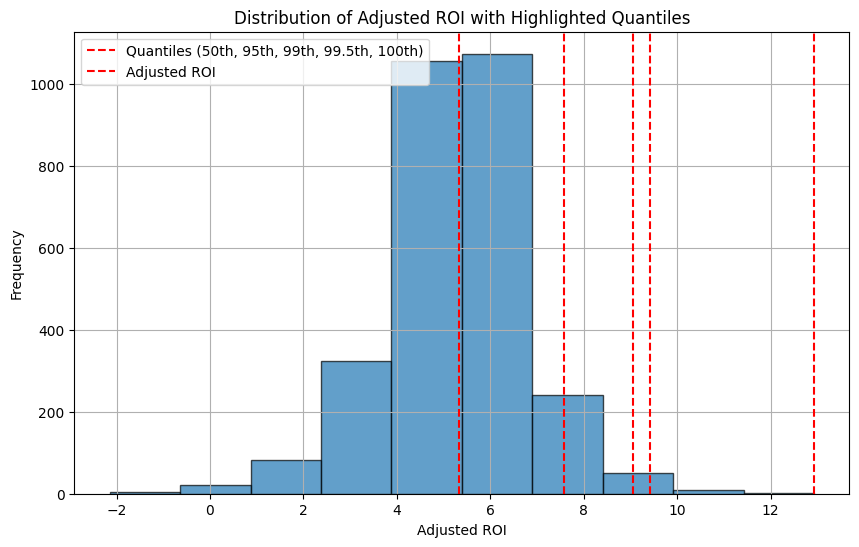

In [536]:

# Calculate the 90th, 95th, and 99th percentiles
percentiles = set_df['adjusted_ROI'].quantile([0.5, 0.95, 0.99, 0.995, 1])

# Print the percentile to see the values
print(percentiles)

# let's see percentile on the graph, but first let's apply log adjusted_ROI for better visualization and analysis

import numpy as np
set_df['log_adjusted_ROI'] = np.log1p(set_df['adjusted_ROI'])
log_quantiles = set_df['log_adjusted_ROI'].quantile([0.5, 0.95, 0.99, 0.995, 1])

# Optionally, you could plot the quantiles to visualize the data distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(set_df['log_adjusted_ROI'], bins=10, edgecolor='k', alpha=0.7)
for quantile in log_quantiles:
    plt.axvline(x=quantile, color='red', linestyle='--')
plt.xlabel('Adjusted ROI')
plt.ylabel('Frequency')
plt.title('Distribution of Adjusted ROI with Highlighted Quantiles')
plt.legend(['Quantiles (50th, 95th, 99th, 99.5th, 100th)', 'Adjusted ROI'])
plt.grid(True)
plt.show()


So you can see that outliers is somewhere between 99.5% and 100%. Let's see the list.

!TODO: write about Mad Max and that we have real numbers for the first movies from wiki. And currently only first 5 movies is far away from others

In [537]:
quantile_99 = set_df['adjusted_ROI'].quantile(0.995)
max_value = set_df['adjusted_ROI'].max()  # This corresponds to the 100th percentile

# Count the number of values between the 99th and 100th percentiles
count_between = set_df[(set_df['adjusted_ROI'] > quantile_99) & (set_df['adjusted_ROI'] <= max_value)].shape[0]

# Print the result
print(f'Number of values between 99th and 100th percentiles: {count_between}')

set_df[(set_df['adjusted_ROI'] > quantile_99) & (set_df['adjusted_ROI'] <= max_value)][['title', "adjusted_ROI"]].sort_values(by='adjusted_ROI', ascending=False)


Number of values between 99th and 100th percentiles: 20


title  adjusted_ROI
1250    the blair witch project     414298.50
2967                deep throat     399900.00
1653          lady frankenstein      69741.50
432              pink flamingos      49900.00
639                  open water      41952.27
1422                    mad max      28471.43
213                 el mariachi      28148.03
1923   night of the living dead      26215.79
1725                      rocky      22425.04
3354                  halloween      21522.77
277       the way of the dragon      20669.23
3151          american graffiti      17918.02
387                  easy rider      14900.00
2221  the legend of boggy creek      13650.00
2958                       once      12844.07
2739          napoleon dynamite      11429.52
3673                     clerks      11327.49
2785   ...and god created woman      10900.00
1440                keeping mum      10885.03
2956                     vixen!      10858.90

We can see the same from relative Z-score (https://sixsigmastudyguide.com/z-scores-z-table-z-transformations/), A Z score of 3 refers to 3 standard deviations, so z-scores greater than +3 shouws considered outliers

In [538]:
from scipy.stats import zscore

set_df['ROI Z-score'] = zscore(set_df['adjusted_ROI'])
outliers_z_score = set_df[set_df['ROI Z-score'].abs() > 3]
outliers_z_score

title  runtime  rated  tmdb_vote_average  \
432            pink flamingos       93  nc-17               6.20   
639                open water       79      r               5.51   
1250  the blair witch project       81      r               6.33   
1653        lady frankenstein       99      r               5.08   
2967              deep throat       61      x               5.30   

      tmdb_vote_count  release_month  release_year  adjusted_ROI  is_english  \
432               440              3          1972      49900.00           1   
639               981             10          2003      41952.27           1   
1250             4363              7          1999     414298.50           1   
1653               51             10          1971      69741.50           0   
2967              137              6          1972     399900.00           1   

      title_vector  overview_vector  tagline_vector  plot_vector  \
432           0.01             0.12            0.05         0.14   
639           0.00             0.10            0.12         0.14   
1250          0.15             0.09            0.16         0.11   
1653          0.01             0.17            0.06         0.22   
2967          0.00             0.19            0.11         0.21   

      overview_sentiment  title_sentiment  tagline_sentiment  plot_sentiment  \
432                -0.03            -0.10              -0.40           -0.03   
639                 0.00             0.00               0.00            0.17   
1250                0.03             0.00               0.35           -0.10   
1653                0.32             0.00              -0.62           -0.15   
2967                0.07             0.00               0.10            0.60   

      director_popularity  writer_popularity  producer_popularity  \
432                  9.95               9.95                 9.95   
639                  3.79               0.00                 0.79   
1250                 5.30               5.30                 2.34   
1653                 3.58               2.46                 6.08   
2967                 2.50               2.50                 1.40   

      average_crew_popularity  number_crew_members  average_cast_popularity  \
432                      3.84                24.00                     1.34   
639                      1.79                27.00                     2.92   
1250                     1.12               114.00                     2.99   
1653                     2.05                19.00                     5.57   
2967                     3.07                11.00                     4.25   

      number_cast_members  top_cast_popularity  num_spoken_languages  \
432                 63.00                25.37                     1   
639                  6.00                15.71                     1   
1250                10.00                23.21                     1   
1653                16.00                50.25                     2   
2967                12.00                41.24                     1   

      num_genres  num_production_companies  num_production_countries  action  \
432            2                         2                         1       0   
639            3                         1                         1       0   
1250           2                         2                         1       0   
1653           2                         2                         1       0   
2967           1                         2                         1       0   

      action,adventure  action,adventure,animation,family  \
432                  0                                  0   
639                  0                                  0   
1250                 0                                  0   
1653                 0                                  0   
2967                 0                                  0   

      action,adventure,animation,family,comedy  \
432                    

So we don't have a lot of outliers and they are legitable. Let's try to define labels for ROI column.

I would consider 2 ways of labeling :

1. almost according quartiles from describe

- ROI < 0 = loss
- 0% < ROI < 113.18 = low.
- 113.18 < ROI < 343 = moderate.
- ROI > 343 = high.

2. According to "3x its budget" rule because that's what investors would like to know:

- ROI < 300 - flop
- ROI > 300 - hit

In [539]:
def categorize_roi(roi):
    if roi < 300:
        return 'flop'
    else:
        return 'hit'

# Apply the categorization function to the ROI column
set_df['ROI_category'] = set_df['adjusted_ROI'].apply(categorize_roi)

label_mapping = {
    'flop': 0,
    'hit': 1
}
set_df['numerical_ROI_category'] = set_df['ROI_category'].map(label_mapping)

#set_df.drop(['log_adjusted_ROI', 'ROI Z-score', 'ROI_category', 'adjusted_ROI'], axis=1, inplace=True)
set_df.drop(['log_adjusted_ROI', 'ROI Z-score', 'ROI_category', 'adjusted_ROI'], axis=1, inplace=True)

In [1]:
set_df.drop(['title'], axis=1, inplace=True)

NameError: name 'set_df' is not defined

TRAINING

In [ ]:
# !TODO: need to look that labels are equally splitted between sets
df_full_train, df_test = train_test_split(set_df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

X_train = df_train.reset_index(drop=True)
X_val = df_val.reset_index(drop=True)
X_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del X_train['median_house_value']
del X_val['median_house_value']
del X_test['median_house_value']

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(X_train.to_dict(orient='records'))
X_val = dv.transform(X_val.to_dict(orient='records'))